In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [3]:
norm.cdf(0)

0.5

In [4]:
def Black_Scholes(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [5]:
ticker = "PG"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source="yahoo", start="2010-1-1", end="2019-12-31")["Adj Close"]

In [6]:
S = data.iloc[-1]
S

PG    121.889549
Name: 2019-12-31 00:00:00, dtype: float64

In [7]:
log_returns = np.log(1 + data.pct_change())

In [8]:
stdev = log_returns.std() * (250 ** 0.5)
stdev

PG    0.147369
dtype: float64

In [9]:
r = 0.0175
K = 120
T = 1

In [10]:
d1(S, K, r, stdev, T)

PG    0.298451
dtype: float64

In [11]:
d2(S, K, r, stdev, T)

PG    0.151083
dtype: float64

In [12]:
Black_Scholes(S, K, r, stdev, T)

PG    9.205421
Name: 2019-12-31 00:00:00, dtype: float64

In [13]:
# Euler discretization
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [14]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [15]:
S0

PG    121.889549
Name: 2019-12-31 00:00:00, dtype: float64

In [16]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev.values ** 2) * delta_t + stdev.values * delta_t ** 0.5 * Z[t])

In [17]:
S.shape

(251, 10000)

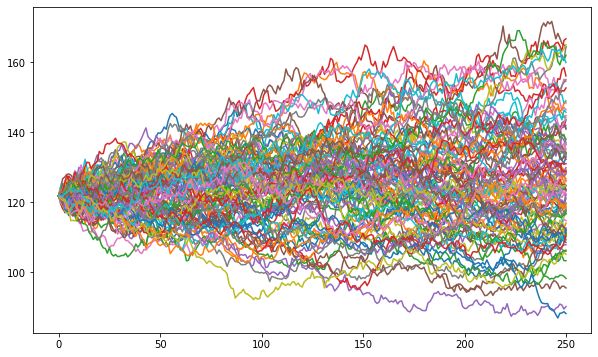

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :100])
plt.show()

In [22]:
p = np.maximum(S[-1] - 120, 0)

In [27]:
p.shape

(10000,)

In [29]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

9.199475332237682